In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import compute_pw_dist_sqr
import torch
from diffusion import DDPMDynamic

In [2]:
ode_samples = np.load("results/ode_samples_true.npz")
x, states, ll = ode_samples.values()

In [3]:
(x ** 2).sum(axis=(1, 2, 3))

array([0.9998057 , 1.008962  , 1.0097253 , 1.0173397 , 1.006836  ,
       0.97287995, 0.9938582 , 1.0112225 , 0.99973786, 0.99686205,
       0.98860997, 1.0000938 , 0.9940822 , 0.9952193 , 0.99218756,
       0.9935719 , 0.99383825, 0.98767906, 1.0018418 , 0.9987792 ,
       0.9802108 , 1.016096  , 1.0024679 , 0.98628664, 0.99710387,
       1.0182672 , 1.0090678 , 1.0162232 , 1.005322  , 0.99445945,
       1.0060941 , 0.9791339 , 0.99643636, 0.9977219 , 0.9757902 ,
       1.0123923 ], dtype=float32)

Text(0, 0.5, 'Average L2 norm of state')

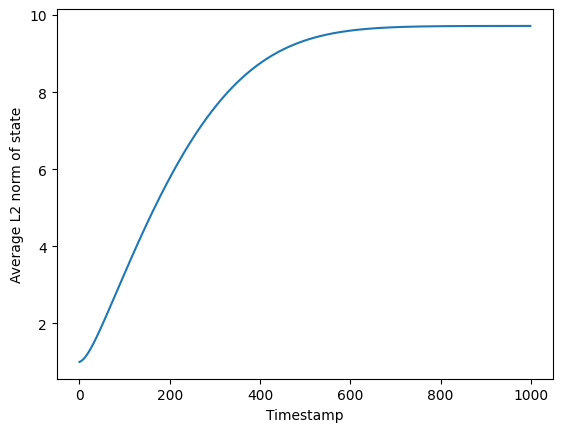

In [4]:
plt.plot((states ** 2).sum(axis=(2, 3, 4)).mean(0) ** 0.5)
plt.xlabel("Timestamp")
plt.ylabel("Average L2 norm of state")

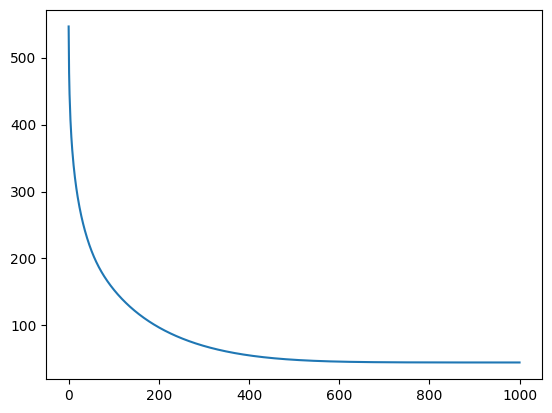

In [5]:
plt.plot(ll.mean(0))

In [6]:
train_data = np.load("results/train_data.npy")
(train_data ** 2).sum(axis=1).mean() ** 0.5

np.float32(10.0)

In [ ]:
bs, ts, *_ = states.shape

alpha_bar = DDPMDynamic().alpha_bar
temp = (1 - alpha_bar) / alpha_bar


dist_sqr = compute_pw_dist_sqr(
    torch.tensor(train_data),
    (states / alpha_bar.sqrt()[:, None, None, None]).reshape(bs * ts, -1)
).reshape(-1, bs, ts)



max_dist_sqr = dist_sqr.max(0).values
true_ll = (dist_sqr - max_dist_sqr).exp().mean(0).log() + max_dist_sqr
true_ll /= 2 * temp
true_ll -= 0.5 * train_data.shape[1]  * np.sqrt(2 * np.pi)
true_ll -= train_data.shape[1] * (1 - alpha_bar).log()

tensor([[[5.0760e+05, 2.3081e+05, 1.4112e+05,  ..., 4.3066e+01,
          4.3066e+01, 4.3066e+01],
         [5.1994e+05, 2.3635e+05, 1.4446e+05,  ..., 4.7133e+01,
          4.7133e+01, 4.7133e+01],
         [5.2783e+05, 2.3997e+05, 1.4669e+05,  ..., 4.9112e+01,
          4.9112e+01, 4.9111e+01],
         ...,
         [5.0832e+05, 2.3129e+05, 1.4149e+05,  ..., 3.8831e+01,
          3.8831e+01, 3.8830e+01],
         [5.1502e+05, 2.3422e+05, 1.4322e+05,  ..., 3.4109e+01,
          3.4109e+01, 3.4108e+01],
         [5.0725e+05, 2.3069e+05, 1.4106e+05,  ..., 4.8707e+01,
          4.8707e+01, 4.8707e+01]],

        [[5.1998e+05, 2.3688e+05, 1.4506e+05,  ..., 4.3218e+01,
          4.3216e+01, 4.3215e+01],
         [5.1646e+05, 2.3501e+05, 1.4378e+05,  ..., 4.7200e+01,
          4.7199e+01, 4.7198e+01],
         [5.0163e+05, 2.2816e+05, 1.3953e+05,  ..., 4.9094e+01,
          4.9094e+01, 4.9094e+01],
         ...,
         [4.9691e+05, 2.2571e+05, 1.3786e+05,  ..., 3.8694e+01,
          3.869